In [112]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
%matplotlib inline

In [113]:
loan_status = pd.read_csv('/home/bhavani/SecureT/credit_train.csv',header = 0,nrows=6000)
loan_status = loan_status.dropna()
loan_status.columns = loan_status.columns.str.replace(' ', '')
loan_status.head(10)


,LoanID,CustomerID,LoanStatus,CurrentLoanAmount,Term,CreditScore,AnnualIncome,Yearsincurrentjob,HomeOwnership,Purpose,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090,0.0,0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13,1,122170,272052,1.0,0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4,0,437171,555038,0.0,0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16,0,203965,289784,0.0,0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6,0,134083,220220,0.0,0
14,2e841c8f-3dc1-464d-91c1-3d3d51e64c38,2ac05980-7848-4692-89ae-9321afe650f8,Fully Paid,234124,Short Term,727.0,693234.0,10+ years,Rent,Debt Consolidation,14211.24,24.7,46.0,10,1,28291,107052,1.0,0
17,24e8c8bd-d10b-4dac-8b81-1da470ff5ecb,967e8733-7189-49b7-a3ab-6a1d0e1abdac,Fully Paid,666204,Long Term,723.0,1821967.0,10+ years,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,15,0,813694,2004618,0.0,0
20,150ebbad-ebed-441e-b70d-2f350ad7dca6,40f729c9-54c7-4768-9fb5-2fa41d074c48,Charged Off,317108,Long Term,687.0,1133274.0,8 years,Rent,Debt Consolidation,9632.81,17.4,53.0,4,0,60287,126940,0.0,0
25,578c8e10-3214-4491-bdbc-b1695ef8ff87,cbe53e22-ba67-4eaf-a4fb-c5acdd12ec66,Fully Paid,465410,Long Term,688.0,1722654.0,3 years,Rent,Buy House,15647.45,22.3,30.0,7,0,107559,488356,0.0,0
28,ccc6dadf-7530-4ca6-a679-a228ae478b5d,689da294-ff83-4d49-986a-c61887f6d4e2,Fully Paid,99999999,Short Term,746.0,1749748.0,10+ years,Home Mortgage,Debt Consolidation,19247.19,20.0,32.0,17,0,224390,295240,0.0,0


In [114]:
print('Number of customers:'+str(len(loan_status.index)))
print(list(loan_status.columns))

Number of customers:2171
['LoanID', 'CustomerID', 'LoanStatus', 'CurrentLoanAmount', 'Term', 'CreditScore', 'AnnualIncome', 'Yearsincurrentjob', 'HomeOwnership', 'Purpose', 'MonthlyDebt', 'YearsofCreditHistory', 'Monthssincelastdelinquent', 'NumberofOpenAccounts', 'NumberofCreditProblems', 'CurrentCreditBalance', 'MaximumOpenCredit', 'Bankruptcies', 'TaxLiens']


In [115]:
loan_status.shape

(2171, 19)

In [116]:
print("Response rate----")
print(loan_status['LoanStatus'].value_counts()/loan_status.shape[0]*100)

Response rate----
Fully Paid     78.995854
Charged Off    21.004146
Name: LoanStatus, dtype: float64


# Analyse

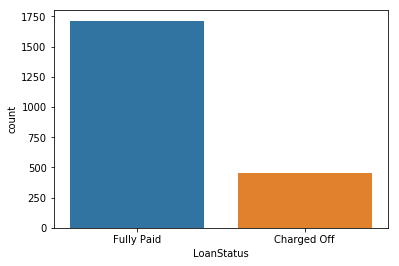

In [117]:
sns.countplot(x = 'LoanStatus', data = loan_status)

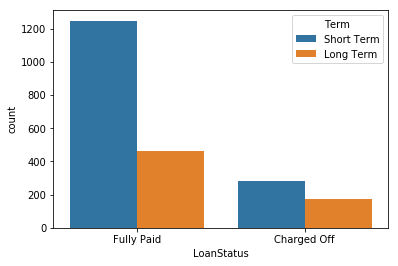

In [118]:
sns.countplot(x = 'LoanStatus', hue ='Term', data=loan_status)

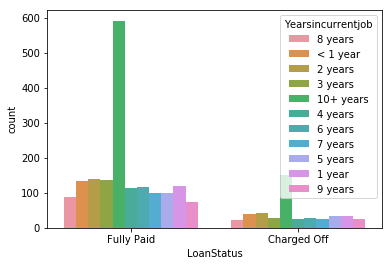

In [119]:
sns.countplot(x = 'LoanStatus', hue ='Yearsincurrentjob', data=loan_status)

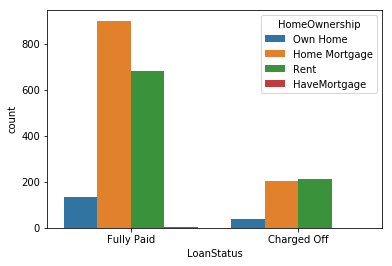

In [120]:
sns.countplot(x = 'LoanStatus', hue ='HomeOwnership', data=loan_status)

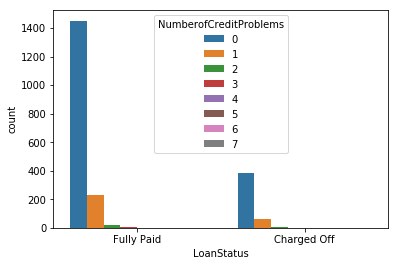

In [121]:
sns.countplot(x = 'LoanStatus', hue ='NumberofCreditProblems', data=loan_status)

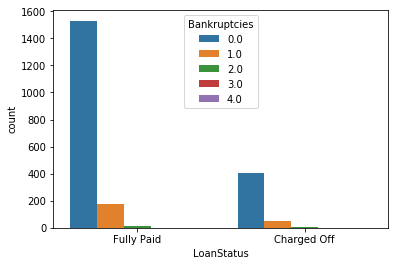

In [122]:
sns.countplot(x = 'LoanStatus', hue ='Bankruptcies', data=loan_status)

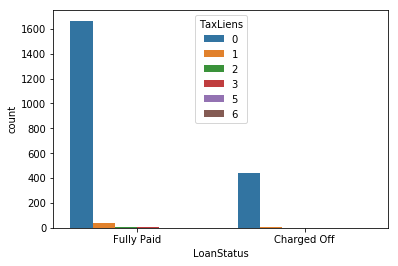

In [123]:
sns.countplot(x = 'LoanStatus', hue ='TaxLiens', data=loan_status)

In [124]:
loan_status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 2 to 5999
Data columns (total 19 columns):
LoanID                       2171 non-null object
CustomerID                   2171 non-null object
LoanStatus                   2171 non-null object
CurrentLoanAmount            2171 non-null int64
Term                         2171 non-null object
CreditScore                  2171 non-null float64
AnnualIncome                 2171 non-null float64
Yearsincurrentjob            2171 non-null object
HomeOwnership                2171 non-null object
Purpose                      2171 non-null object
MonthlyDebt                  2171 non-null float64
YearsofCreditHistory         2171 non-null float64
Monthssincelastdelinquent    2171 non-null float64
NumberofOpenAccounts         2171 non-null int64
NumberofCreditProblems       2171 non-null int64
CurrentCreditBalance         2171 non-null int64
MaximumOpenCredit            2171 non-null int64
Bankruptcies                 2171 non-null 

# Data Wrangling

In [125]:
loan_status.isnull()

,LoanID,CustomerID,LoanStatus,CurrentLoanAmount,Term,CreditScore,AnnualIncome,Yearsincurrentjob,HomeOwnership,Purpose,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [126]:
loan_status.drop('LoanID', axis=1, inplace = True)
loan_status.drop('CustomerID', axis=1, inplace = True)
loan_status.drop('Bankruptcies', axis = 1, inplace = True)
loan_status.drop('NumberofOpenAccounts', axis = 1, inplace = True)
loan_status.drop('TaxLiens', axis = 1, inplace = True)
loan_status.drop('Yearsincurrentjob', axis = 1, inplace = True)

In [127]:
loan_status.head(10)

,LoanStatus,CurrentLoanAmount,Term,CreditScore,AnnualIncome,HomeOwnership,Purpose,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit
2,Fully Paid,99999999,Short Term,741.0,2231892.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,1,297996,750090
6,Fully Paid,217646,Short Term,730.0,1184194.0,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,1,122170,272052
8,Fully Paid,548746,Short Term,678.0,2559110.0,Rent,Debt Consolidation,18660.28,22.6,33.0,0,437171,555038
10,Fully Paid,99999999,Short Term,728.0,714628.0,Rent,Debt Consolidation,11851.06,16.0,76.0,0,203965,289784
12,Fully Paid,99999999,Short Term,740.0,776188.0,Own Home,Debt Consolidation,11578.22,8.5,25.0,0,134083,220220
14,Fully Paid,234124,Short Term,727.0,693234.0,Rent,Debt Consolidation,14211.24,24.7,46.0,1,28291,107052
17,Fully Paid,666204,Long Term,723.0,1821967.0,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,0,813694,2004618
20,Charged Off,317108,Long Term,687.0,1133274.0,Rent,Debt Consolidation,9632.81,17.4,53.0,0,60287,126940
25,Fully Paid,465410,Long Term,688.0,1722654.0,Rent,Buy House,15647.45,22.3,30.0,0,107559,488356
28,Fully Paid,99999999,Short Term,746.0,1749748.0,Home Mortgage,Debt Consolidation,19247.19,20.0,32.0,0,224390,295240


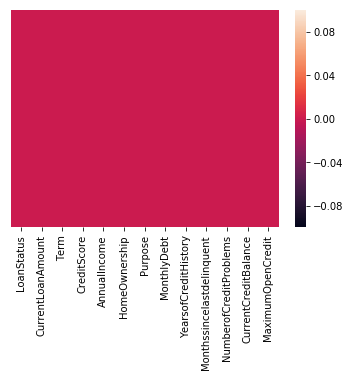

In [128]:
sns.heatmap(loan_status.isnull(),yticklabels= False) #No null values 

In [129]:
loan_status

,LoanStatus,CurrentLoanAmount,Term,CreditScore,AnnualIncome,HomeOwnership,Purpose,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit
2,Fully Paid,99999999,Short Term,741.0,2231892.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,1,297996,750090
6,Fully Paid,217646,Short Term,730.0,1184194.0,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,1,122170,272052
8,Fully Paid,548746,Short Term,678.0,2559110.0,Rent,Debt Consolidation,18660.28,22.6,33.0,0,437171,555038
10,Fully Paid,99999999,Short Term,728.0,714628.0,Rent,Debt Consolidation,11851.06,16.0,76.0,0,203965,289784
12,Fully Paid,99999999,Short Term,740.0,776188.0,Own Home,Debt Consolidation,11578.22,8.5,25.0,0,134083,220220
14,Fully Paid,234124,Short Term,727.0,693234.0,Rent,Debt Consolidation,14211.24,24.7,46.0,1,28291,107052
17,Fully Paid,666204,Long Term,723.0,1821967.0,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,0,813694,2004618
20,Charged Off,317108,Long Term,687.0,1133274.0,Rent,Debt Consolidation,9632.81,17.4,53.0,0,60287,126940
25,Fully Paid,465410,Long Term,688.0,1722654.0,Rent,Buy House,15647.45,22.3,30.0,0,107559,488356
28,Fully Paid,99999999,Short Term,746.0,1749748.0,Home Mortgage,Debt Consolidation,19247.19,20.0,32.0,0,224390,295240


In [130]:
cols_to_transform = ['LoanStatus', 'Term', 'HomeOwnership', 'Purpose','NumberofCreditProblems'] 
data = pd.get_dummies(data = loan_status, columns = cols_to_transform)
data

,CurrentLoanAmount,CreditScore,AnnualIncome,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,CurrentCreditBalance,MaximumOpenCredit,LoanStatus_Charged Off,LoanStatus_Fully Paid,...,Purpose_vacation,Purpose_wedding,NumberofCreditProblems_0,NumberofCreditProblems_1,NumberofCreditProblems_2,NumberofCreditProblems_3,NumberofCreditProblems_4,NumberofCreditProblems_5,NumberofCreditProblems_6,NumberofCreditProblems_7
2,99999999,741.0,2231892.0,29200.53,14.9,29.0,297996,750090,0,1,...,0,0,0,1,0,0,0,0,0,0
6,217646,730.0,1184194.0,10855.08,19.6,10.0,122170,272052,0,1,...,0,0,0,1,0,0,0,0,0,0
8,548746,678.0,2559110.0,18660.28,22.6,33.0,437171,555038,0,1,...,0,0,1,0,0,0,0,0,0,0
10,99999999,728.0,714628.0,11851.06,16.0,76.0,203965,289784,0,1,...,0,0,1,0,0,0,0,0,0,0
12,99999999,740.0,776188.0,11578.22,8.5,25.0,134083,220220,0,1,...,0,0,1,0,0,0,0,0,0,0
14,234124,727.0,693234.0,14211.24,24.7,46.0,28291,107052,0,1,...,0,0,0,1,0,0,0,0,0,0
17,666204,723.0,1821967.0,17612.24,22.0,34.0,813694,2004618,0,1,...,0,0,1,0,0,0,0,0,0,0
20,317108,687.0,1133274.0,9632.81,17.4,53.0,60287,126940,1,0,...,0,0,1,0,0,0,0,0,0,0
25,465410,688.0,1722654.0,15647.45,22.3,30.0,107559,488356,0,1,...,0,0,1,0,0,0,0,0,0,0
28,99999999,746.0,1749748.0,19247.19,20.0,32.0,224390,295240,0,1,...,0,0,1,0,0,0,0,0,0,0


# Train data

In [131]:
X = data.drop('LoanStatus_Fully Paid', axis = 1)
y= data['LoanStatus_Fully Paid']

In [132]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =1)

In [133]:
logmodel = LogisticRegression()

In [134]:
logmodel.fit(X_train,y_train)

/home/bhavani/PycharmProjects/NumpyJupyter/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [135]:
predictions = logmodel.predict(X_test)

In [136]:
from sklearn.metrics import classification_report

In [137]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.97      0.26      0.42       136\n           1       0.84      1.00      0.91       516\n\n   micro avg       0.85      0.85      0.85       652\n   macro avg       0.91      0.63      0.66       652\nweighted avg       0.87      0.85      0.81       652\n'

In [138]:
from sklearn.metrics import confusion_matrix

In [139]:
confusion_matrix(y_test, predictions)

array([[ 36, 100],
       [  1, 515]])

In [140]:
from sklearn.metrics import accuracy_score


In [141]:
accuracy_score(y_test, predictions)

0.8450920245398773